![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [136]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt
# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Start coding here...
# Add as many cells as you like...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [137]:
schools.groupby('school_name')['average_math'].sum().sort_values(ascending = False).head(10)

school_name
Stuyvesant High School                                                   754
Bronx High School of Science                                             714
Staten Island Technical High School                                      711
Queens High School for the Sciences at York College                      701
High School for Mathematics, Science, and Engineering at City College    683
Brooklyn Technical High School                                           682
Townsend Harris High School                                              680
High School of American Studies at Lehman College                        669
New Explorations into Science, Technology and Math High School           657
Eleanor Roosevelt High School                                            641
Name: average_math, dtype: int64

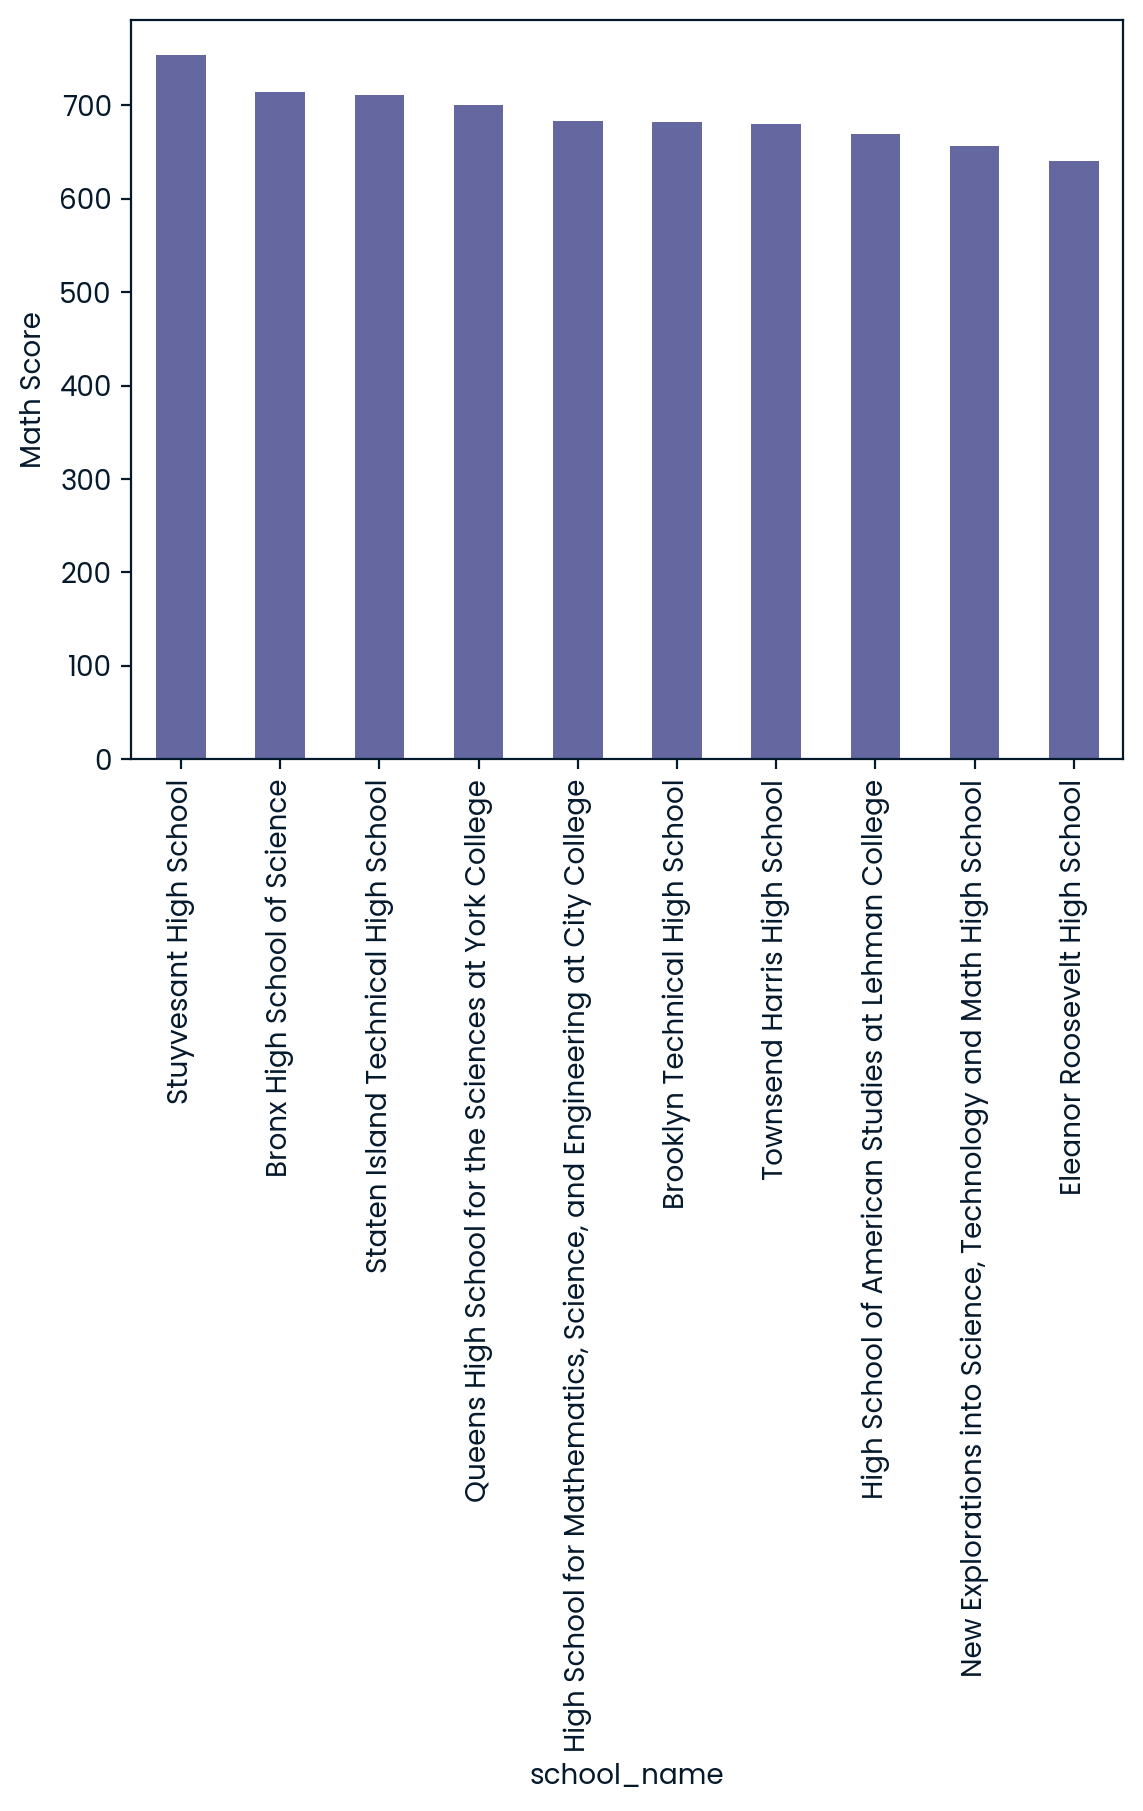

In [126]:
import matplotlib.pyplot as plt

best_math_schools = schools.groupby('school_name')['average_math'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Math Score')
plt.show()

In [127]:
best_math_schools = schools[schools['average_math'] >= 640].sort_values(by='average_math', ascending=False)
best_math_schools = best_math_schools[['school_name','average_math']]

In [128]:
best_math_schools.head()

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683


In [129]:
top_10_schools1 = schools[['borough','school_name','average_math','average_reading','average_writing']]

In [130]:
top_10_schools1['total_SAT'] = top_10_schools1['average_math'] + top_10_schools1['average_reading'] + top_10_schools1['average_writing']

In [138]:
import plotly.express as px

# Sort and select top 10 schools
sorted_schools = top_10_schools1[['school_name', 'total_SAT']].sort_values(by='total_SAT', ascending=False).head(10)

# Create bar chart
fig = px.bar(sorted_schools, x='school_name', y='total_SAT', title='Top 10 Schools by Total SAT Score', labels={'school_name': 'School Name', 'total_SAT': 'Total SAT Score'})
fig.show()

# Update the top_10_schools variable
sorted_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


In [132]:
top_10_schools1.head()

,borough,school_name,average_math,average_reading,average_writing,total_SAT
0,Manhattan,"New Explorations into Science, Technology and ...",657,601,601,1859
1,Manhattan,Essex Street Academy,395,411,387,1193
2,Manhattan,Lower Manhattan Arts Academy,418,428,415,1261
3,Manhattan,High School for Dual Language and Asian Studies,613,453,463,1529
4,Manhattan,Henry Street School for International Studies,410,406,381,1197


In [133]:
top_10_schools1.groupby('borough')['total_SAT'].agg(["sum","min", "max", "median","std"])

,sum,min,max,median,std
borough,,,,,
Bronx,117867,924,2041,1190.0,150.393901
Brooklyn,134098,926,1896,1186.0,154.868427
Manhattan,119272,1005,2144,1284.0,230.294140
Queens,92838,978,1981,1290.0,195.252899
Staten Island,14390,1258,2041,1382.0,222.303596


In [134]:
# Calculate the statistics for each borough
borough_stats = top_10_schools1.groupby('borough')['total_SAT'].agg(
    num_schools='count',
    average_SAT='mean',
    std_SAT='std'
).reset_index()

# Find the borough with the largest standard deviation
largest_std_dev = borough_stats[borough_stats["std_SAT"] == borough_stats["std_SAT"].max()]

# Round the numeric values to two decimal places
largest_std_dev = largest_std_dev.round({'num_schools': 2, 'average_SAT': 2, 'std_SAT': 2})

# Rename the columns to match the required output
largest_std_dev.columns = ['borough', 'num_schools', 'average_SAT', 'std_SAT']